# Analysis of end states of GLUT5 string 

We have 3 replicas of simulations, so need to load in 6 sims. To make loading easier and more automatic, simulations have been processed to be aligned and cut and exist in `input_f`

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

In [2]:
in1 = mda.Universe('../end_state_simulations/IN/GLUT5_in.1.start.protonly.gro', '../end_state_simulations/IN/GLUT5_in.1.skip250.protonly.xtc')
in2 = mda.Universe('../end_state_simulations/IN/GLUT5_in.2.start.protonly.gro', '../end_state_simulations/IN/GLUT5_in.2.skip250.protonly.xtc')
in3 = mda.Universe('../end_state_simulations/IN/GLUT5_in.3.start.protonly.gro', '../end_state_simulations/IN/GLUT5_in.3.skip250.protonly.xtc')

out1 = mda.Universe('../end_state_simulations/OUT/GLUT5_out.1.start.protonly.gro', '../end_state_simulations/OUT/GLUT5_out.1.skip250.protonly.xtc')
out2 = mda.Universe('../end_state_simulations/OUT/GLUT5_out.2.start.protonly.gro', '../end_state_simulations/OUT/GLUT5_out.2.skip250.protonly.xtc')
out3 = mda.Universe('../end_state_simulations/OUT/GLUT5_out.3.start.protonly.gro', '../end_state_simulations/OUT/GLUT5_out.3.skip250.protonly.xtc')


In [3]:
gate_EC = [(30,37), (289,295)]
gate_IC = [(136,145), (386,394)]

In [4]:
from MDAnalysis.analysis import distances

def make_gate_arr(md_uni, gate_EC, gate_IC):
    gate_EC_dists = []
    gate_IC_dists = []
    
    for timestep in md_uni.trajectory:
        tm1 = md_uni.select_atoms('resid %i-%i' %(gate_EC[0][0], gate_EC[0][1])).center_of_mass()
        tm7 = md_uni.select_atoms('resid %i-%i' %(gate_EC[1][0], gate_EC[1][1])).center_of_mass()
        tm4 = md_uni.select_atoms('resid %i-%i' %(gate_IC[0][0], gate_IC[0][1])).center_of_mass()
        tm10 = md_uni.select_atoms('resid %i-%i' %(gate_IC[1][0], gate_IC[1][1])).center_of_mass()    


        gate_EC_dists.append(float(distances.distance_array(tm1, tm7)))
        gate_IC_dists.append(float(distances.distance_array(tm4, tm10)))

    return gate_EC_dists, gate_IC_dists

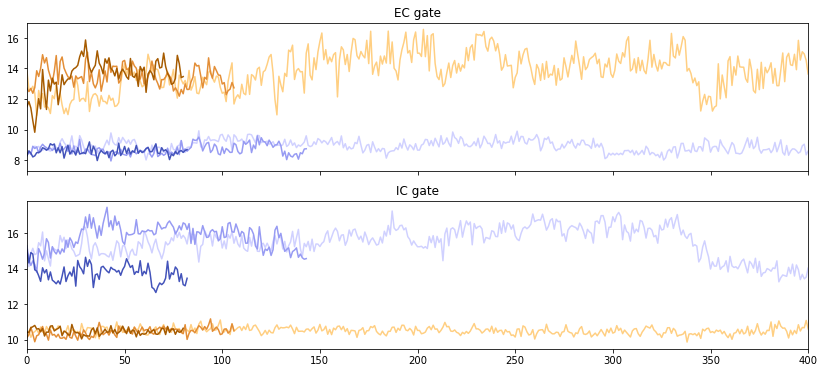

In [28]:
sims = [in1,in2,in3,out1,out2,out3]
names = ['In 1', 'In 2', 'In 3', 'Out 1', 'Out 2', 'Out 3']
colors = ['#D0D1FF','#979BF3', '#4353BA', '#FFCF82', '#E38E37', '#A65B00']
figsize = (14,6)
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize)

for ind, sim in enumerate(sims):
    ec, ic = make_gate_arr(sim, gate_EC, gate_IC)
    ax1.set_title('EC gate')
    ax1.plot(ec, label = names[ind], color = colors[ind])
    
    ax2.set_title("IC gate")
    ax2.plot(ic, label = names[ind], color = colors[ind])
    
#plt.legend()
plt.xlim(0,400)
plt.show()

# RMSD

(0.0, 400.0)

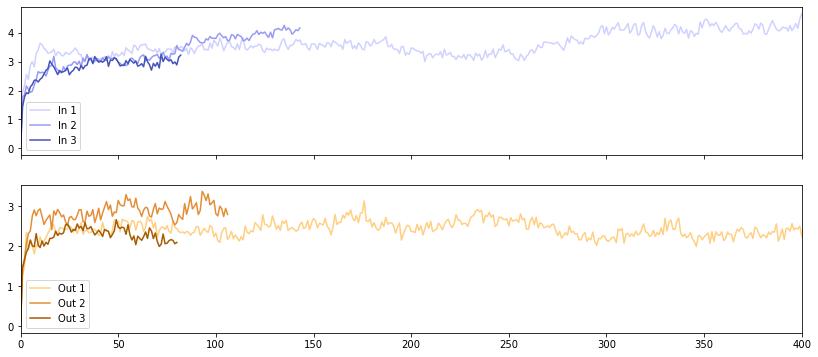

In [37]:
import MDAnalysis.analysis.rms

figsize = (14,6)
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize)


for ind, sim in enumerate(sims):
    RMSD = MDAnalysis.analysis.rms.RMSD(sim, select = 'backbone', center = True)
    RMSD.run()
    
    rmsd = RMSD.rmsd.T
    if ind < 3:
        ax1.plot(rmsd[2], label = names[ind], color = colors[ind])
        ax1.legend()
    else:
        ax2.plot(rmsd[2], label = names[ind], color = colors[ind])
        ax2.legend()
plt.xlim(0,400)